<a href="https://colab.research.google.com/github/ssoma2mc/Data110/blob/main/ShinkoSoma_Project1_Task1%262_Selection%26EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data 110 Data Visualization
# Project 1:


# **Task 1. Dataset Selection**


- I chose the dataset 'life_exp_kaggle_full.csv'.

- The data is assumed to be sourced from Kaggle's life expectancy dataset from the WHO. However, it differs from the Kaggle dataset available on their website, and I could not find a data dictionary to verify the dataset's specifics.

- Breafly mentioning about life expectancy,  life expectancy refers to the average number of years a person born in a specific country or region can expect to live in good health, as opposed to being a simple statistic of the age at death.

- Factors that influence life expectancy, according to existing literature, include variables such as income, education, healthcare, and nutrition 1-3).

- All of the data in this dataset are considered predictor variables, as they are well-known determinants of life expectancy. While region and race can also be predictors, they are generally secondary factors.

- Recently, the impact of CO2 on life expectancy has attracted significant attention 4).
      
      1) Mackenbach, J. P., Valverde, J. R., Bopp, M., Brønnum-Hansen, H., Deboosere, P., Kalediene, R., Kovács, K., Leinsalu, M., Martikainen, P., Menvielle, G., Regidor, E., & Nusselder, W. J. (2019). Determinants of inequalities in life expectancy: an international comparative study of eight risk factors. The Lancet. Public Health, 4(10), e529–e537. https://doi.org/10.1016/S2468-2667(19)30147-1
      2) Hauck, K., Martin, S., & Smith, P. C. (2016). Priorities for action on the social determinants of health: Empirical evidence on the strongest associations with life expectancy in 54 low-income countries, 1990–2012. Social Science & Medicine (1982), 167, 88–98. https://doi.org/10.1016/j.socscimed.2016.08.035
      3) Eriksen, S., & Wiese, R. (2019). Policy induced increases in private healthcare financing provide short-term relief of total healthcare expenditure growth: Evidence from OECD countries. European Journal of Political Economy, 59, 71–82. https://doi.org/10.1016/j.ejpoleco.2019.02.001
      4) Bressler, R. D. (2021). The mortality cost of carbon. Nature Communications, 12(1), 1–12. https://doi.org/10.1038/s41467-021-24487-w







# **Task 2: Exploratory Data Analysis (EDA)**

2.1. Firtst, I used the following codes and explor the data.

      - df.head()
      - df.tail()
      - df.shape
      - df.info()
      - df.describe()
      - df.isna().sum()

      - sns.heatmap(df.isna(), cmap='coolwarm', cbar=False)
      - plt.show()

      - df.duplicated().sum()
      - df.nunique()
      - df.corr()

      - for numerical data
        - numeric_df = df.select_dtypes(include=['number'])
        - numeric_df.corr()

        - plt.figure(figsize=(10, 8))
        - sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
        - plt.title("Correlation Matrix")
        - plt.show()

      - for categorical data
        - categorical_df = df.select_dtypes(include=['object'])
        - print(categorical_df.head())
        - df[''].value_counts()
        - df[''].value_counts(normalize=True) * 100
2.2. After that, I use the data to answer the following basic qustions.(
  This is written in Task 3 Data Visualization file)

    - 1) What is the current Life Expectancy?
    - 2) How does Life Expectancy vary by country, and reagion?
    - 3) What factors influence Life Expectancy? Task 3 Data Visualization.
    - 4) Can we predict the life expectacy from this data?



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.optimize import curve_fit

In [ ]:
sns.set_style("whitegrid")
sns.color_palette("viridis", n_colors=10)
#colors = sns.color_palette("viridis", n_colors=10)

[(0.283072, 0.130895, 0.449241),
 (0.262138, 0.242286, 0.520837),
 (0.220057, 0.343307, 0.549413),
 (0.177423, 0.437527, 0.557565),
 (0.143343, 0.522773, 0.556295),
 (0.119512, 0.607464, 0.540218),
 (0.166383, 0.690856, 0.496502),
 (0.319809, 0.770914, 0.411152),
 (0.525776, 0.833491, 0.288127),
 (0.762373, 0.876424, 0.137064)]

In [ ]:
colors = sns.color_palette("viridis", n_colors=10)

In [ ]:
file_path = 'https://raw.githubusercontent.com/ssoma2mc/Data110/main/Project_1/life_exp_kaggle_full.csv'
df = pd.read_csv(file_path)

### Task 2.2.1 Data Data Exploration

In [ ]:
#df.head()
#df.tail()
#df.shape
#df.info()
#df.describe()
#df.isna().sum()
#sns.heatmap(df.isna(), cmap='coolwarm', cbar=False)
#plt.show()
#df.duplicated().sum()
#df.nunique()
#df.corr()

## for numerical data
#numeric_df = df.select_dtypes(include=['number'])
#numeric_df.corr()

#plt.figure(figsize=(10, 8))
#sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
#plt.title("Correlation Matrix")
#plt.show()

## for categorical data
#categorical_df = df.select_dtypes(include=['object'])
##print(categorical_df.head())
#df[''].value_counts()
#df[''].value_counts(normalize=True) * 100

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    3306 non-null   object 
 1   Country Code                    3306 non-null   object 
 2   Region                          3306 non-null   object 
 3   IncomeGroup                     3306 non-null   object 
 4   Year                            3306 non-null   int64  
 5   Life Expectancy World Bank      3118 non-null   float64
 6   Prevelance of Undernourishment  2622 non-null   float64
 7   CO2                             3154 non-null   float64
 8   Health Expenditure %            3126 non-null   float64
 9   Education Expenditure %         2216 non-null   float64
 10  Unemployment                    3002 non-null   float64
 11  Corruption                      975 non-null    float64
 12  Sanitation                      20

In [ ]:
df.head()

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.0,NaN,NaN,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.0,4.483516,NaN,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.0,7.139524,3.4587,18.575001,NaN,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.0,5.865939,NaN,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.0,2.484370,NaN,2.493000,NaN,NaN,144678.14,65271.91,481740.70


In [ ]:
df.columns

Index(['Country Name', 'Country Code', 'Region', 'IncomeGroup', 'Year',
       'Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
       'Health Expenditure %', 'Education Expenditure %', 'Unemployment',
       'Corruption', 'Sanitation', 'Injuries', 'Communicable',
       'NonCommunicable'],
      dtype='object')

In [ ]:
# Rename: without space?
df.rename({'Country Name' : 'country',
           'Country Code' : 'country_code',
           'Region' : 'region',
           'IncomeGroup' : 'income',
           'Year' : 'year',
           'Life Expectancy World Bank' : 'life_expectancy',
           'Prevelance of Undernourishment' : 'under_nourishment',
           'CO2': 'co2',
           'Health Expenditure %' : 'health_expenditure',
           'Education Expenditure %' : 'education_expenditure',
           'Unemployment' : 'unemployment',
           'Corruption' : 'corruption' ,
           'Sanitation' : 'sanitation',
           'Injuries' : 'injuries',
           'Communicable' : 'communicable' ,
           'NonCommunicable': 'non_communicable' ,
           },axis=1,inplace=True)

In [ ]:
df.head()

,country,country_code,region,income,year,life_expectancy,under_nourishment,co2,health_expenditure,education_expenditure,unemployment,corruption,sanitation,injuries,communicable,non_communicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.0,NaN,NaN,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.0,4.483516,NaN,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.0,7.139524,3.4587,18.575001,NaN,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.0,5.865939,NaN,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.0,2.484370,NaN,2.493000,NaN,NaN,144678.14,65271.91,481740.70


In [ ]:
df.tail()

,country,country_code,region,income,year,life_expectancy,under_nourishment,co2,health_expenditure,education_expenditure,unemployment,corruption,sanitation,injuries,communicable,non_communicable
3301,Vanuatu,VUT,East Asia & Pacific,Lower middle income,2019,70.474,12.4,209.999993,3.360347,1.77788,1.801000,3.0,NaN,12484.18,26032.56,69213.56
3302,Samoa,WSM,East Asia & Pacific,Lower middle income,2019,73.321,4.4,300.000012,6.363094,4.70625,8.406000,4.0,47.698788,6652.84,9095.19,43798.62
3303,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,2019,64.131,6.3,439640.014600,9.109355,5.91771,28.469999,NaN,NaN,3174676.10,13198944.71,10214261.89
3304,Zambia,ZMB,Sub-Saharan Africa,Low income,2019,63.886,NaN,6800.000191,5.312203,4.46518,12.520000,2.5,NaN,510982.75,4837094.00,2649687.82
3305,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2019,61.490,NaN,11760.000230,7.703565,NaN,4.833000,2.5,25.963544,644798.93,4187087.31,2364031.48


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                3306 non-null   object 
 1   country_code           3306 non-null   object 
 2   region                 3306 non-null   object 
 3   income                 3306 non-null   object 
 4   year                   3306 non-null   int64  
 5   life_expectancy        3118 non-null   float64
 6   under_nourishment      2622 non-null   float64
 7   co2                    3154 non-null   float64
 8   health_expenditure     3126 non-null   float64
 9   education_expenditure  2216 non-null   float64
 10  unemployment           3002 non-null   float64
 11  corruption             975 non-null    float64
 12  sanitation             2059 non-null   float64
 13  injuries               3306 non-null   float64
 14  communicable           3306 non-null   float64
 15  non_

In [ ]:
df.describe()

,year,life_expectancy,under_nourishment,co2,health_expenditure,education_expenditure,unemployment,corruption,sanitation,injuries,communicable,non_communicable
count,3306.000000,3118.000000,2622.000000,3.154000e+03,3126.000000,2216.000000,3002.000000,975.000000,2059.000000,3.306000e+03,3.306000e+03,3.306000e+03
mean,2010.000000,69.748362,10.663654,1.574924e+05,6.364059,4.589014,7.890760,2.860513,52.738785,1.318219e+06,4.686289e+06,7.392488e+06
std,5.478054,9.408154,11.285897,7.726415e+05,2.842844,2.119165,6.270832,0.621343,30.126762,5.214068e+06,1.843727e+07,2.932688e+07
min,2001.000000,40.369000,2.500000,1.000000e+01,1.263576,0.850320,0.100000,1.000000,2.377647,4.304900e+02,3.301600e+02,2.481820e+03
25%,2005.000000,63.642000,2.500000,2.002500e+03,4.205443,3.136118,3.733000,2.500000,24.746007,6.245688e+04,5.776475e+04,3.184758e+05
50%,2010.000000,72.168500,6.200000,1.020500e+04,5.892352,4.371465,5.920000,3.000000,49.317481,2.456910e+05,3.147693e+05,1.350146e+06
75%,2015.000000,76.809000,14.775000,5.877250e+04,8.119166,5.519825,10.097500,3.250000,80.278847,8.465591e+05,2.831636e+06,3.918468e+06
max,2019.000000,84.356341,70.900000,1.070722e+07,24.230680,23.270000,37.250000,4.500000,100.000004,5.563676e+07,2.685646e+08,3.246378e+08


In [ ]:
df.isna().sum()

,0
country,0
country_code,0
region,0
income,0
year,0
life_expectancy,188
under_nourishment,684
co2,152
health_expenditure,180
education_expenditure,1090


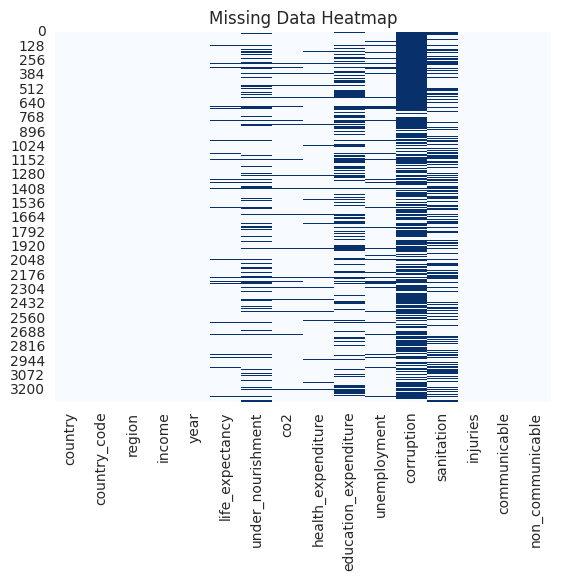

In [ ]:
sns.heatmap(df.isna(), cmap='Blues', cbar=False)
plt.title('Missing Data Heatmap')
plt.show()

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.nunique()

,0
country,174
country_code,174
region,7
income,4
year,19
life_expectancy,2964
under_nourishment,399
co2,2259
health_expenditure,3126
education_expenditure,2192


In [ ]:
# for numerical data
numeric_df = df.select_dtypes(include=['number'])
#print(numeric_df.head())
print(numeric_df.corr())

                           year  life_expectancy  under_nourishment       co2  \
year                   1.000000         0.203013          -0.144081  0.023258   
life_expectancy        0.203013         1.000000          -0.686749  0.130382   
under_nourishment     -0.144081        -0.686749           1.000000 -0.117334   
co2                    0.023258         0.130382          -0.117334  1.000000   
health_expenditure     0.093686         0.326404          -0.259551  0.109116   
education_expenditure  0.029346         0.208019          -0.248436 -0.042915   
unemployment          -0.050321        -0.056668          -0.037870 -0.058695   
corruption            -0.013471         0.263566          -0.307317  0.072381   
sanitation             0.117233         0.680025          -0.547040  0.097204   
injuries              -0.005951        -0.006020           0.012722  0.649054   
communicable          -0.037286        -0.217812           0.140288  0.206830   
non_communicable       0.018

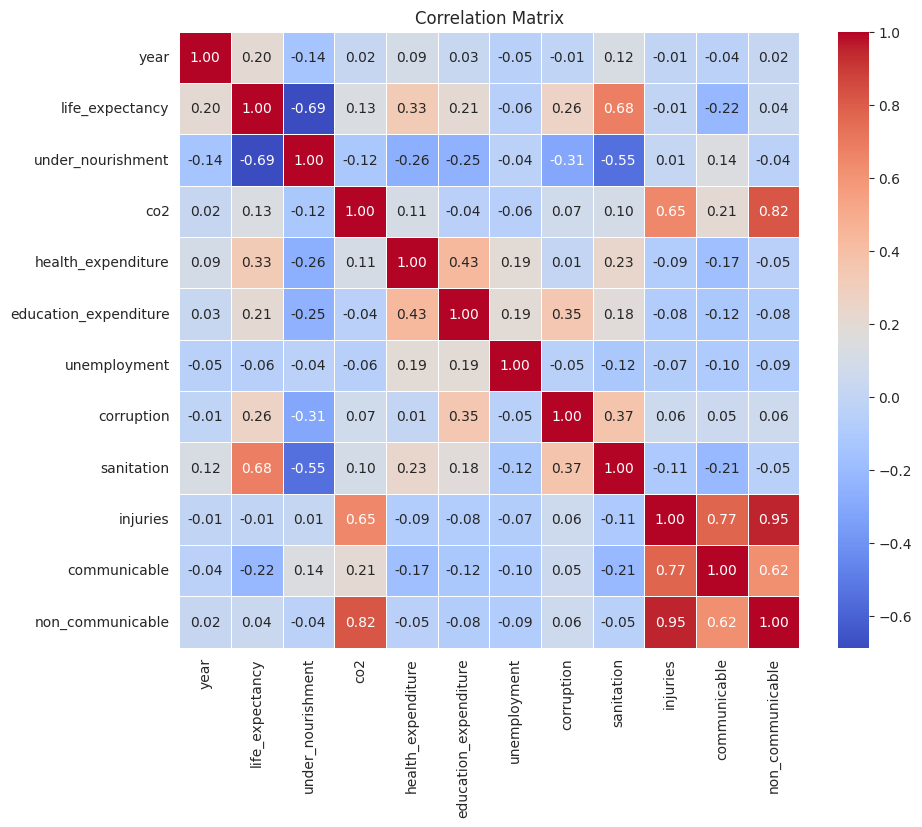

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# for categorical data
categorical_df = df.select_dtypes(include=['object'])
print(categorical_df.head())

df['region'].value_counts()
df['region'].value_counts(normalize=True) * 100

df['income'].value_counts()
df['income'].value_counts(normalize=True) * 100

                country country_code                      region  \
0           Afghanistan          AFG                  South Asia   
1                Angola          AGO          Sub-Saharan Africa   
2               Albania          ALB       Europe & Central Asia   
3               Andorra          AND       Europe & Central Asia   
4  United Arab Emirates          ARE  Middle East & North Africa   

                income  
0           Low income  
1  Lower middle income  
2  Upper middle income  
3          High income  
4          High income  


,proportion
income,
High income,32.758621
Upper middle income,28.160920
Lower middle income,25.862069
Low income,13.218391
